In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


In the histogram, on the y-axis, you will see the total no. of pixels, and on the x-axis, you will know the intensity. For unit 8, the max intensity will be 255.

Histogram gives us the overall idea about the intensity distribution of an image.

here I have connected google colab with google drive to access photos from drive.


in the code given below, I am finding the total number of pixels regarding to each intensity. and returing the list of total number of pixels.

In [ ]:
#finding the freq. for each intensity
def histogram(img,h,w):
  pixel=[0 for i in range(256)]
  for i in range(h):
    for j in range(w):
      pixel[img[i,j]]+=1
  return pixel

In this code, I am calculating the frequancy to make histogram for the given image. I am appending each pixel to the list depending on the image's shape.

In [ ]:
#To find intensity of an image:
def intensity(img):
  h,w=img.shape
  l=[]
  for i in range(h):
    for j in range(w):
      l.append(img[i,j])
  return l

Here I am just calculating the cdf of each intensity using histogram function that I made above.

In [ ]:
#calculating cdf to create the equlized image
def calculatecdf(img,h,w):
  pixel=histogram(img,h,w)
  cdf=np.cumsum(pixel)/np.sum(pixel)
  return cdf

**equalization of Images**

To equalize to images I have made a function which first takes the cdf value from above function. Then I am finding equalized cdf by multiplying cdf by maximum intensity.

To make the equalized photo, I am creating a dark photo using np.zeros function. And then i am setting the pixel of that dark picutre accoriding to the equalized cdf of the image. And I am doing this with nested loops, taking care of the shape of the image. At the end of the function I am returning the equalized image.

In [ ]:
#equalization of images
def equalization(img,h,w):
  pixel=histogram(img,h,w)
  cdf=calculatecdf(img,h,w)
  cdf1=[]
  for i in range(len(cdf)):
    y=np.round((cdf[i])*255)
    y=int(y)
    cdf1.append(y)
  l=[0 for i in range(256)]
  for i in range(len(cdf1)):
    l[cdf1[i]]=l[cdf1[i]]+pixel[i]
  equalhisto1=np.zeros((h,w))
  for i in range(h):
    for j in range(w):
        equalhisto1[i,j]=l[img[i,j]]
  equalhisto2=np.zeros((h,w))
  for i in range(h):
    for j in range(w):
        equalhisto2[i,j]=cdf1[img[i,j]]
  return equalhisto2,l

**Final matching**

To finally match two images, I have made a function, in the begning of the funciton I have calculated the cdf of both the images and divided it with the respective shape of the image. Here we are dividing the cdf with height and width of the image to find the normilzied cdf. Cdf is cumulative distributuion function that always lays between on 0 to 1. To ensure that, we are dividing it with (h*w). Normalization also ensures that all the pixels are correctly distributed in the image for final matching.

After getting the cdf, I am doing nearest value mapping that is the final mapping. And at the last, I have made a dark image and I am updating it with the new pixels that I got from the final matching in list l. I am returning the final image at the last.

In [ ]:
#final histogram matching
def matching(img1,img2):
  h1,w1=img1.shape
  h2,w2=img2.shape
  src_cdf=calculatecdf(img1,h1,w2)/(h1*w1)
  tar_cdf=calculatecdf(img2,h2,w2)/(h2*w2)
  l=[0 for i in range(256)]
  for i in range(256):
    j=0
    while j<256 and tar_cdf[j]<src_cdf[i]:
      j+=1
    l[i]=j
  finalimg=np.zeros((h1,w1))
  for i in range(h1):
    for j in range(w1):
      finalimg[i,j]=l[img1[i,j]]
  return finalimg

In the below code, I am first connecting the colab with my drive. The first line takes the permmision to connect colab and drive. After that I am reading all the images using opencv and calculating the freq. for each images to make histrogram of that image.

In [ ]:
#getting all the images and their histogram
drive.mount('/content/drive')
img1 = cv.imread('/content/drive/MyDrive/histogram_matching/grey_1.png',0)
img2=cv.imread('/content/drive/MyDrive/histogram_matching/grey_2.png',0)
img3=cv.imread('/content/drive/MyDrive/histogram_matching/grey_3.png',0)
img4=cv.imread('/content/drive/MyDrive/histogram_matching/grey_4.png',0)
(h1,w1)=img1.shape
(h2,w2)=img2.shape
(h3,w3)=img3.shape
(h4,w4)=img4.shape
p1=intensity(img1)
p2=intensity(img2)
p3=intensity(img3)
p4=intensity(img4)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here, with the use of subplots function of matplotlib, I have plotted the images and histograms of all the images.

(array([76017.,   903.,   739.,     0.,   835.,     0.,   771.,     0.,
          742.,   870.,     0.,   795.,     0.,   914.,     0.,   899.,
          858.,     0.,   864.,     0.,   861.,     0.,   843.,   770.,
            0.,   810.,     0.,   833.,   773.,     0.,   788.,     0.,
          783.,     0.,   773.,   792.,     0.,   872.,     0.,   920.,
            0.,   910.,   939.,     0.,   980.,     0.,   959.,     0.,
          907.,  1167.,     0.,  1000.,     0.,  1014.,     0.,  1174.,
         1330.,     0.,  1284.,     0.,  1448.,  1460.,     0.,  1575.,
            0.,  1543.,     0.,  1442.,  1516.,     0.,  1505.,     0.,
         1214.,     0.,  1459.,  1480.,     0.,  1430.,     0.,  1509.,
            0.,  1344.,  1135.,     0.,  1136.,     0.,  1007.,     0.,
          917.,   847.,     0.,   799.,     0.,   870.,   788.,     0.,
          784.,     0.,   770.,     0.,   699.,   727.,     0.,   629.,
            0.,   686.,     0.,   708.,   676.,     0.,   727., 

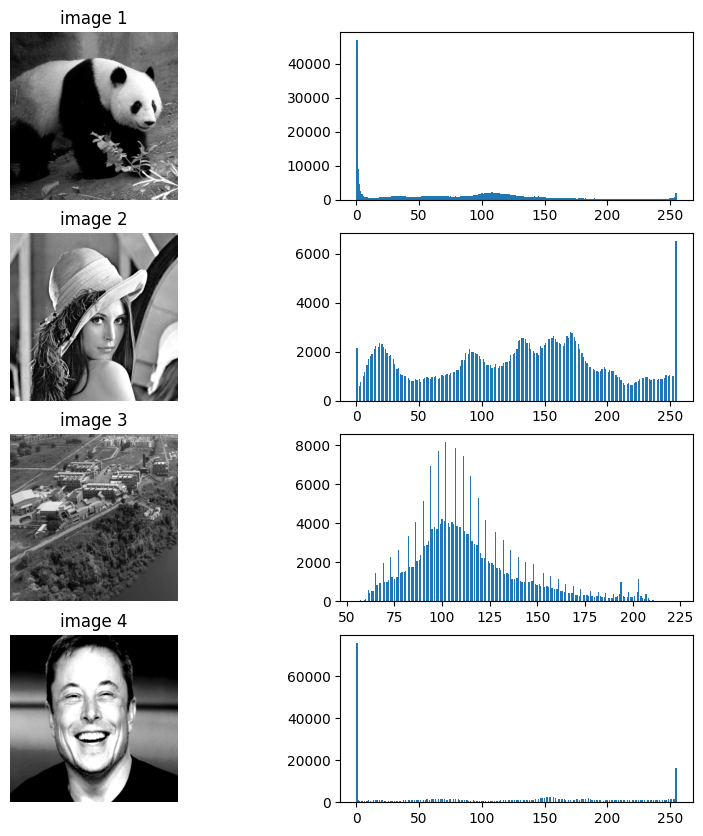

In [ ]:
#the images and their histograms
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8))=plt.subplots(4,2,figsize=(10,10))
ax1.imshow(img1,cmap='gray')
ax1.axis('off')
ax1.title.set_text('image 1')
ax2.hist(p1,bins=256)
ax3.imshow(img2,cmap='gray')
ax3.axis('off')
ax3.title.set_text('image 2')
ax4.hist(p2,bins=256)
ax5.imshow(img3,cmap='gray')
ax5.axis('off')
ax5.title.set_text('image 3')
ax6.hist(p3,bins=256)
ax7.imshow(img4,cmap='gray')
ax7.axis('off')
ax7.title.set_text('image 4')
ax8.hist(p4,bins=256)

In the below code I am assigning y1, y2, y3 and y4 values for the equalized images of all the images. and l1,l2,l3 and l4 are the pixels of each images that are important to make the equalized histogram.

In [ ]:
y1,l1=equalization(img1,h1,w1)
y2,l2=equalization(img2,h2,w2)
y3,l3=equalization(img3,h3,w3)
y4,l4=equalization(img4,h4,w4)

I have plotted all the equalized images and their respective equalized histogram graphs.

<BarContainer object of 256 artists>

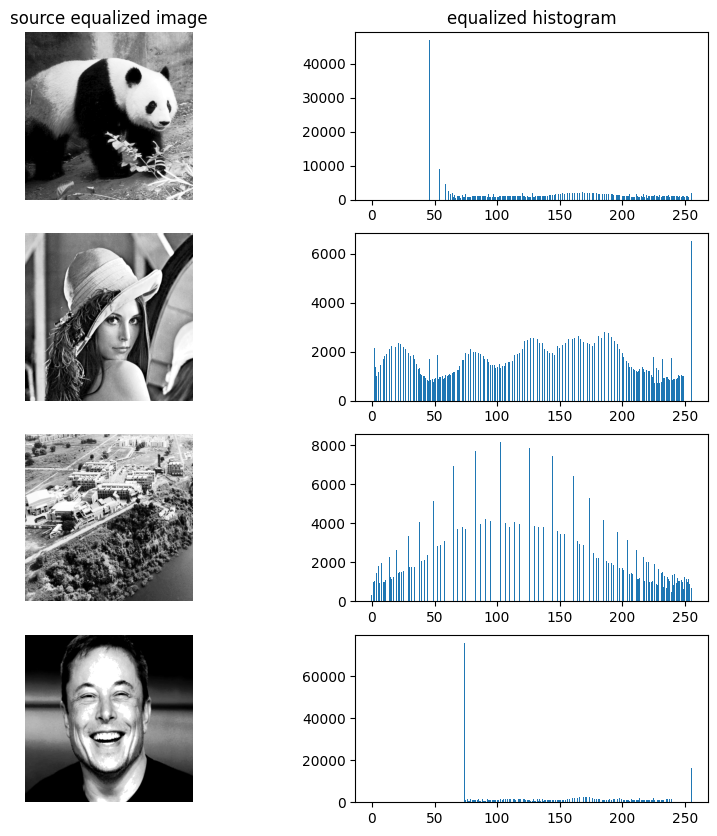

In [ ]:
#the images and their equalized histograms
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8))=plt.subplots(4,2,figsize=(10,10))
ax1.imshow(y1,cmap='gray')
ax1.axis('off')
ax1.title.set_text('source equalized image')
ax2.bar(range(256),l1)
ax2.title.set_text('equalized histogram')
ax3.imshow(y2,cmap='gray')
ax3.axis('off')
ax4.bar(range(256),l2)
ax5.imshow(y3,cmap='gray')
ax5.axis('off')
ax6.bar(range(256),l3)
ax7.imshow(y4,cmap='gray')
ax7.axis('off')
ax8.bar(range(256),l4)

To match all the images, I have stored the values of the final images in the variables f1,f2,f3 and f4. And then plotted all the final matching images using subplot function of matplotlib.

(-0.5, 511.5, 511.5, -0.5)

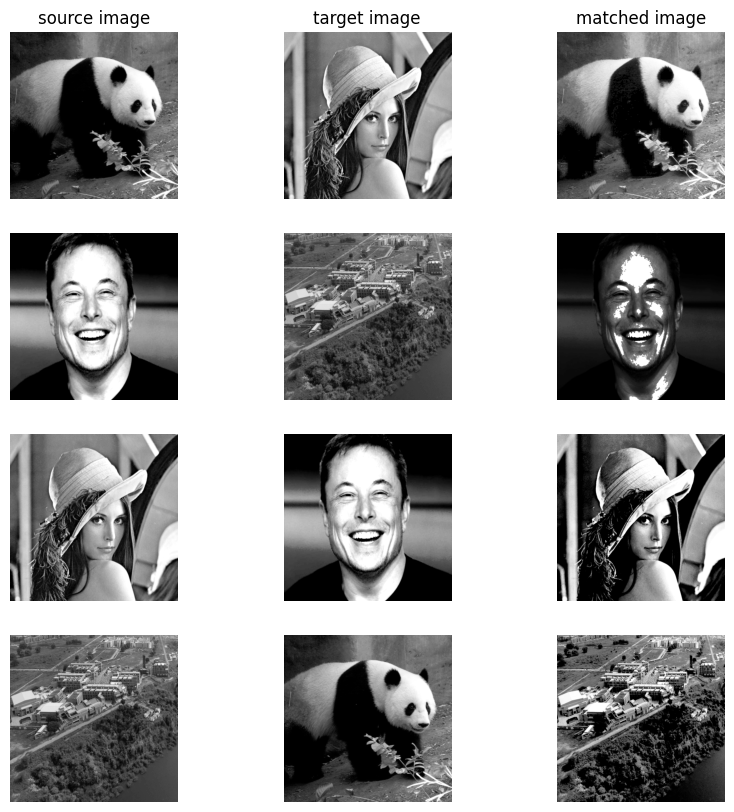

In [ ]:
#the final matched image and its histogram
f1=matching(img1,img2)
f2=matching(img4,img3)
f3=matching(img2,img4)
f4=matching(img3,img1)
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,figsize=(10,10))
ax1.imshow(img1,cmap='gray')
ax1.axis('off')
ax1.title.set_text('source image')
ax2.imshow(img2,cmap='gray')
ax2.axis('off')
ax2.title.set_text('target image')
ax3.imshow(f1,cmap='gray')
ax3.axis('off')
ax3.title.set_text('matched image')
ax4.imshow(img4,cmap='gray')
ax4.axis('off')
ax5.imshow(img3,cmap='gray')
ax5.axis('off')
ax6.imshow(f2,cmap='gray')
ax6.axis('off')
ax7.imshow(img2,cmap='gray')
ax7.axis('off')
ax8.imshow(img4,cmap='gray')
ax8.axis('off')
ax9.imshow(f3,cmap='gray')
ax9.axis('off')
ax10.imshow(img3,cmap='gray')
ax10.axis('off')
ax11.imshow(img1,cmap='gray')
ax11.axis('off')
ax12.imshow(f4,cmap='gray')
ax12.axis('off')

source:

[1] https://www.w3schools.com/python/matplotlib_histograms.asp

[2] https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/

[3] https://www.educative.io/answers/how-to-plot-the-histogram-of-an-image-in-python

[4] https://towardsdatascience.com/histogram-matching-ee3a67b4cbc1
